In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from utils.evaluation import Evaluation

from sklearn.model_selection import GridSearchCV


pd.set_option("display.max_columns", None)

In [2]:
path = "data/diabetes_processed_dataset.csv"

df = pd.read_csv(path)

In [3]:
df.head()

,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,bmi,hbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1
0,32.0,Alabama,0,0,0,0,1,27.32,5.0,100,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,29.0,Alabama,0,1,0,0,0,19.95,5.0,90,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,18.0,Alabama,0,0,0,0,1,23.76,4.8,160,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,41.0,Alabama,0,0,1,0,0,27.32,4.0,159,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,52.0,Alabama,1,0,0,0,0,23.75,6.5,90,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## Split and Target Encoding *location*

In [10]:
X = df.drop(['diabetes'], axis = 1)
y = df['diabetes']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
encoder = TargetEncoder(cols=['location'])
X_train['location'] = encoder.fit_transform(X_train['location'], y_train)
X_test['location'] = encoder.transform(X_test['location'])

## Raw Prediction

In [13]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

### Evaluation

Accuracy: 0.9542


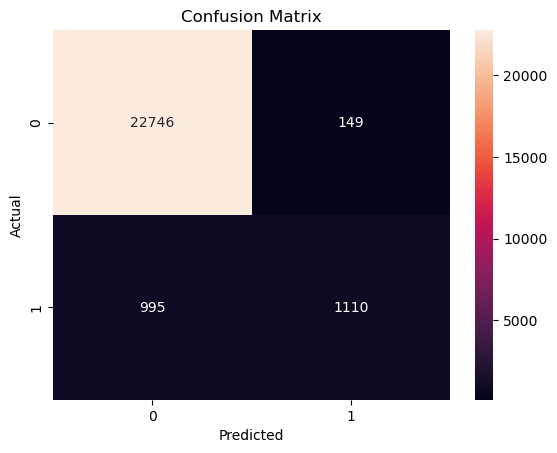

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     22895
           1       0.88      0.53      0.66      2105

    accuracy                           0.95     25000
   macro avg       0.92      0.76      0.82     25000
weighted avg       0.95      0.95      0.95     25000



In [14]:
eval = Evaluation()

eval.evaluate_model(y_test, y_pred)

## Tunning Prediction

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50],
    'p': [1, 2]
}

smaller_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}

In [16]:
knn = KNeighborsClassifier()

In [17]:
grid_search = GridSearchCV(knn, param_grid, n_jobs=1, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

print(f"Melhores parâmetros:\n {grid_search.best_params_}")

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV] END algorithm=auto, leaf_size=20, n_neighbors=3, p=1, weights=uniform; total time=   4.1s
[CV] END algorithm=auto, leaf_size=20, n_neighbors=3, p=1, weights=uniform; total time=   3.7s
[CV] END algorithm=auto, leaf_size=20, n_neighbors=3, p=1, weights=uniform; total time=   5.1s
[CV] END algorithm=auto, leaf_size=20, n_neighbors=3, p=1, weights=uniform; total time=   5.0s
[CV] END algorithm=auto, leaf_size=20, n_neighbors=3, p=1, weights=uniform; total time=   4.6s
[CV] END algorithm=auto, leaf_size=20, n_neighbors=3, p=1, weights=distance; total time=   4.8s
[CV] END algorithm=auto, leaf_size=20, n_neighbors=3, p=1, weights=distance; total time=   5.6s
[CV] END algorithm=auto, leaf_size=20, n_neighbors=3, p=1, weights=distance; total time=   5.9s
[CV] END algorithm=auto, leaf_size=20, n_neighbors=3, p=1, weights=distance; total time=   5.9s
[CV] END algorithm=auto, leaf_size=20, n_neighbors=3, p=1, weights=distance; 

/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


### Final Prediction

In [18]:
knn = KNeighborsClassifier(
    n_neighbors=7,
    weights='uniform',
    algorithm='auto',
    leaf_size=20,
    p=2
)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

### Evaluation

Accuracy: 0.9556


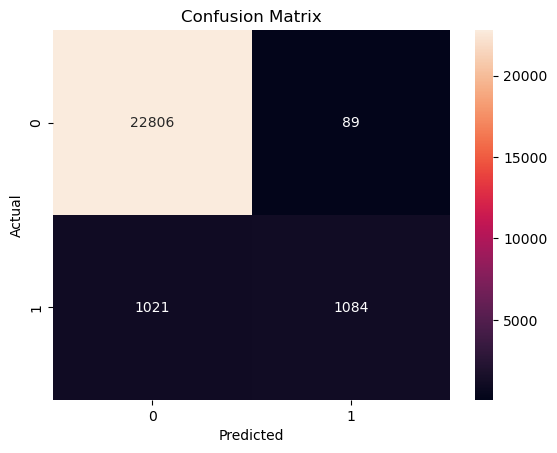

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     22895
           1       0.92      0.51      0.66      2105

    accuracy                           0.96     25000
   macro avg       0.94      0.76      0.82     25000
weighted avg       0.95      0.96      0.95     25000



In [19]:
eval = Evaluation()

eval.evaluate_model(y_test, y_pred)